To address the k-armed bandit problem https://en.wikipedia.org/wiki/Multi-armed_bandit

In [289]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import beta
from scipy.integrate import trapz
%matplotlib inline  

In [305]:
class Arm():
    def __init__(self, prob):
        self.prob = prob
        
    def pull(self):
        return np.random.choice([0,1], 1, p = [1 - self.prob, self.prob])[0]

class Bandit():
    def __init__(self, probs):
        self.arms = {k:Arm(v) for k,v in enumerate(probs)}
    
    def pull_arm(self, arm_id):
        return self.arms[arm_id].pull()

In [306]:
probs = [0.1, 0.05]
n = 1000
bandit = Bandit(probs)

data = [] 
for _ in range(n):
    arm = np.random.choice(list(range(len(probs))))
    data.append([arm, bandit.pull_arm(arm), _])

In [307]:
df = pd.DataFrame(data, columns=['arm', 'score', 'time'])

In [308]:
agg = df.groupby(['arm', 'time']).agg([len, np.sum])['score'].reset_index()

In [309]:
total_numbers=agg.pivot('time', 'arm')['len'].fillna(0).cumsum()
arms_trials=total_numbers.max()
print(arms_trials)

arm
0    492.0
1    508.0
dtype: float64


In [204]:
total_success=agg.pivot('time', 'arm')['sum'].fillna(0).cumsum() #the 1s

arms_success=total_success.max()
print(arms_success)
#beta_c=len(agg[agg.arm==0])-alpha_c

arm
0    49.0
1    18.0
dtype: float64


In [205]:
arms_failures=arms_trials - arms_success
print(arms_failures)

arm
0    434.0
1    499.0
dtype: float64


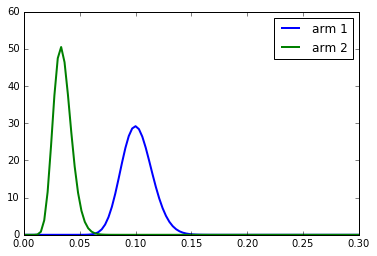

In [207]:
x = np.linspace(0, 0.3, 100)
#arm1
plt.plot(x, beta(arms_success[0],arms_failures[0]).pdf(x), lw=2,label='arm 1')
#arm2
plt.plot(x, beta(arms_success[1],arms_failures[1]).pdf(x), lw=2, label='arm 2')
plt.legend()

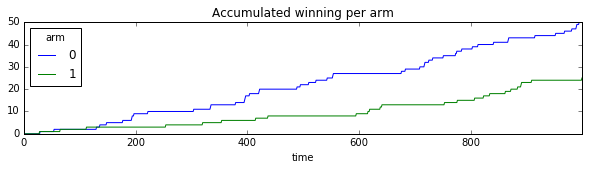

In [310]:
pltr = agg.pivot('time', 'arm')['sum'].fillna(0).cumsum()
pltr.plot(figsize=(10, 2), title = "Accumulated winning per arm")

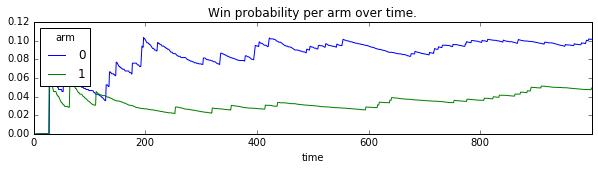

In [311]:
pltr = (pltr / agg.pivot('time', 'arm')['len'].fillna(0).cumsum())
_ = pltr.plot(figsize=(10, 2), title="Win probability per arm over time.")

In [312]:
total_profit = agg.pivot('time', 'arm')['sum'].cumsum().sum(axis = 1).max()
max_expected_profit = np.max(probs)*n
print("total profit is {}".format(total_profit))
print("total regret is {}".format(max_expected_profit - total_profit))

total profit is 50.0
total regret is 50.0


In [50]:
#original solution

In [313]:
def pick_arm(counter, epsilon=0.05):
    if np.random.uniform() < epsilon:
        probs = [1.0 for _ in counter.keys()]
    else:
        probs = [(counter[_][0] + 0.001)/counter[_][1] for _ in counter.keys()]
    return np.random.choice(list(range(len(counter.keys()))), p = probs/np.sum(probs))

In [314]:
probs = [0.1, 0.05]
n = 1000
bandit = Bandit(probs)
counter = {arm:(1,1) for arm in range(len(probs))}

data = []
for _ in range(n):
    arm = pick_arm(counter, 1/(_+1))
    outcome = bandit.pull_arm(arm)
  
    counter[arm] = counter[arm][0] + outcome, counter[arm][1] + 1
    data.append([arm, bandit.pull_arm(arm), _])


In [316]:
counter

{0: (53, 698), 1: (14, 304)}

In [315]:
df = pd.DataFrame(data, columns=['arm', 'score', 'time'])
agg = df.groupby(['arm', 'time']).agg([len, np.sum])['score'].reset_index()

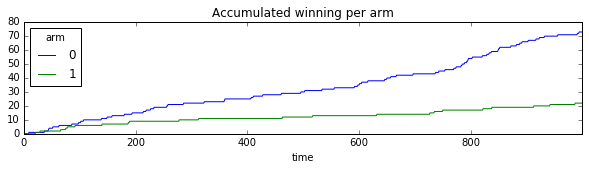

In [47]:
pltr = agg.pivot('time', 'arm')['sum'].fillna(0).cumsum()
_ = pltr.plot(figsize=(10, 2), title = "Accumulated winning per arm")

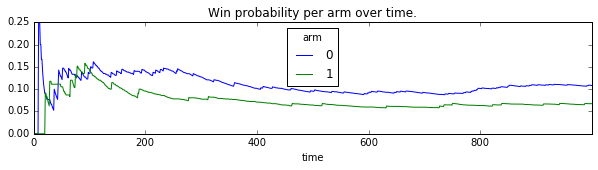

In [48]:
pltr = (pltr / agg.pivot('time', 'arm')['len'].fillna(0).cumsum())
_ = pltr.plot(figsize=(10, 2), title="Win probability per arm over time.")

In [317]:
total_profit = agg.pivot('time', 'arm')['sum'].cumsum().sum(axis = 1).max()
max_expected_profit = np.max(probs)*n
print("total profit is {}".format(total_profit))
print("total regret is {}".format(max_expected_profit - total_profit))

total profit is 68.0
total regret is 32.0


***Alternate solution (simple beta probabilities) - using belief ***

In [493]:
probs = [0.1, 0.05,0.04]
n = 1000
bandit = Bandit(probs)

data = [] 
for _ in range(n):
    arm = np.random.choice(list(range(len(probs))))
    data.append([arm, bandit.pull_arm(arm), _])

In [494]:
df = pd.DataFrame(data, columns=['arm', 'score', 'time'])

In [495]:
df.head()

,arm,score,time
0,0,0,0
1,1,0,1
2,0,0,2
3,1,1,3
4,0,0,4


In [496]:
agg = df.groupby(['arm', 'time']).agg([len, np.sum])['score'].reset_index()

In [497]:
agg.head()

,arm,time,len,sum
0,0,0,1,0
1,0,2,1,0
2,0,4,1,0
3,0,5,1,0
4,0,8,1,0


In [498]:
total_numbers=agg.pivot('time', 'arm')['len'].fillna(0).cumsum()
arms_trials=total_numbers.max()
print(arms_trials)

arm
0    351.0
1    313.0
2    336.0
dtype: float64


In [499]:
total_success=agg.pivot('time', 'arm')['sum'].fillna(0).cumsum() #the 1s

arms_success=total_success.max()
print(arms_success)
#beta_c=len(agg[agg.arm==0])-alpha_c

arm
0    32.0
1    18.0
2    11.0
dtype: float64


In [500]:
arms_failures=arms_trials - arms_success
print(arms_failures)

arm
0    319.0
1    295.0
2    325.0
dtype: float64


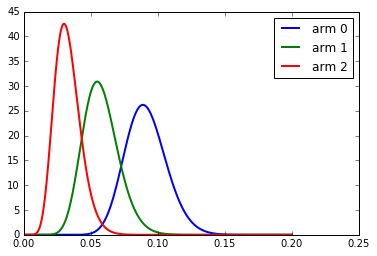

In [504]:
x = np.linspace(0, 0.2, 1000)
#arm1
plt.plot(x, beta(arms_success[0],arms_failures[0]).pdf(x), lw=2,label='arm 0')
#arm2
plt.plot(x, beta(arms_success[1],arms_failures[1]).pdf(x), lw=2, label='arm 1')
plt.plot(x, beta(arms_success[2],arms_failures[2]).pdf(x), lw=2, label='arm 2')
plt.legend()

In [327]:
arm_1_beta=beta(arms_success[0],arms_failures[0]).pdf(x)
arm_2_beta=beta(arms_success[1],arms_failures[1]).pdf(x)
arm_1_mean = arms_success[0]/(arms_success[0]+arms_failures[0])
arm_2_mean = arms_success[1]/(arms_success[1]+arms_failures[1])
print(arm_1_mean)
print(arm_2_mean)

0.0873015873016
0.0483870967742


In [328]:
if(arm_1_mean>arm_2_mean):
    prob_delta=arm_1_beta-arm_2_beta
else:
    prob_delta=arm_2_beta-arm_1_beta
    
np_p_d = np.array(prob_delta) 

#print(np_p_d)
start_point_calc=np.where(np_p_d > 0)[0][0]

#start_point_calc=start_point_calc[0].copy()
print('Positive delta prob after '+str(start_point_calc))

selected_x=x[start_point_calc:]
selected_np_p_d = np_p_d[start_point_calc:]
#print(selected_x)
#print(selected_np_p_d)

#integrate to find out the probability of higher belief
integral = trapz(selected_np_p_d,selected_x)
print(integral)
#np_p_d_sum = np.sum(start_point[start_point_calc:])

#print('Prob: '+str(np_p_d_sum))

Positive delta prob after 22
0.918368250355


In [508]:
counter={0:(arms_success[0],arms_success[0]+arms_failures[0]),1:(arms_success[1],arms_success[1]+arms_failures[1]),
        2:(arms_success[2],arms_success[2]+arms_failures[2])}
counter

{0: (32.0, 351.0), 1: (18.0, 313.0), 2: (11.0, 336.0)}

In [526]:
arm_betas=[]
arm_means=[]
x=np.linspace(0, 1, 1000)
counter=test_counter
for key in counter.keys():
    current_arm = counter[key]

    arm_betas= arm_betas + [beta(current_arm[0],current_arm[1]-current_arm[0]).pdf(x)]

    arm_means.append(current_arm[0]/current_arm[1])

arm_max_index = np.argmax(arm_means)
arm_min_index = np.argmin(arm_means)
arm_max = list(counter.keys())[arm_max_index]

mle_delta = arm_betas[arm_max_index]-arm_betas[arm_min_index]

inflection_plus = np.where(mle_delta>0)
inflection_minus = np.where(mle_delta<0)

if((len(inflection_minus)>0)&(sum(inflection_plus[0]> max(inflection_minus[0]))>0)):
    
    start_point_calc=inflection_plus[0][inflection_plus[0]> max(inflection_minus[0])][0]
else:
    start_point_calc=inflection_plus[0][0]

selected_x=x[start_point_calc:]
selected_mle_delta = mle_delta[start_point_calc:]

integral = trapz(selected_mle_delta,selected_x)
{'arm_max': arm_max, 'integral': integral}

{'arm_max': 2, 'integral': 0.99999999999954003}

In [532]:
def convergence_decision_max_vs_min(counter):
    arm_betas=[]
    arm_means=[]
    x=np.linspace(0, 1, 1000)

    for key in counter.keys():
        current_arm = counter[key]

        arm_betas= arm_betas + [beta(current_arm[0],current_arm[1]-current_arm[0]).pdf(x)]

        arm_means.append(current_arm[0]/current_arm[1])

    arm_max_index = np.argmax(arm_means)
    arm_min_index = np.argmin(arm_means)
    arm_max = list(counter.keys())[arm_max_index]
    arm_min = list(counter.keys())[arm_min_index]

    mle_delta = arm_betas[arm_max_index]-arm_betas[arm_min_index]

    inflection_plus = np.where(mle_delta>0)
    inflection_minus = np.where(mle_delta<0)
   
    if((len(inflection_minus)>0)&(sum(inflection_plus[0]> max(inflection_minus[0]))>0)):
        
        start_point_calc=inflection_plus[0][inflection_plus[0]> max(inflection_minus[0])][0]
    else:
        start_point_calc=inflection_plus[0][0]
    
    selected_x=x[start_point_calc:]
    selected_mle_delta = mle_delta[start_point_calc:]
    
    integral = trapz(selected_mle_delta,selected_x)
    return {'arm_max': arm_max, 'integral_max': integral,'arm_min':arm_min}


In [535]:


test_counter={0:(700,2900),1:(180,900),2:(490,1900)}
convergence_decision_max_vs_min(test_counter)

{'arm_max': 2, 'arm_min': 1, 'integral_max': 0.98593333783716541}

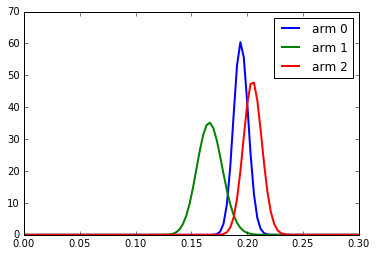

In [537]:
x = np.linspace(0, 0.3, 100)
#arm1
plt.plot(x, beta(700,2900).pdf(x), lw=2,label='arm 0')
#arm2
plt.plot(x, beta(180,900).pdf(x), lw=2, label='arm 1')
plt.plot(x, beta(490,1900).pdf(x), lw=2, label='arm 2')
plt.legend()

In [44]:
def pick_arm2(counter, epsilon=0.05):
    #generate delta prob
    #threshold
    #if threshold reached
    #use the arm with highest prob
    
    if np.random.uniform() < epsilon:
        probs = [1.0 for _ in counter.keys()]
    else:
        probs = [(counter[_][0] + 0.001)/counter[_][1] for _ in counter.keys()]
    return np.random.choice(list(range(len(counter.keys()))), p = probs/np.sum(probs))

In [ ]:
probs = [0.1, 0.05]
n = 1000
bandit = Bandit(probs)
counter = {arm:(1,1) for arm in range(len(probs))}

data = []
for _ in range(n):
    arm = pick_arm2(counter, 1/(_+1))
    outcome = bandit.pull_arm(arm)
  
    counter[arm] = counter[arm][0] + outcome, counter[arm][1] + 1
    data.append([arm, bandit.pull_arm(arm), _])